In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('heart.csv')

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
data.target.value_counts()

1    165
0    138
Name: target, dtype: int64

In [5]:
data.groupby('sex')['target'].mean()

sex
0    0.750000
1    0.449275
Name: target, dtype: float64

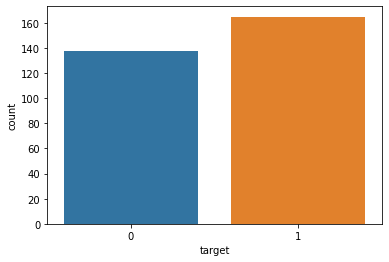

In [6]:
sns.countplot(data=data, x='target')

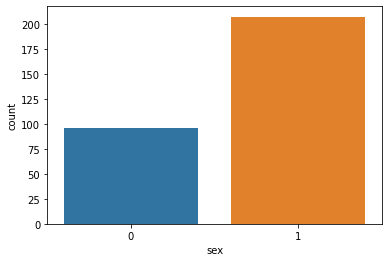

In [7]:
sns.countplot(data=data, x='sex')

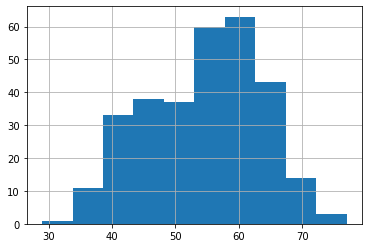

In [8]:
data['age'].hist()

In [9]:
X = data.iloc[ : , :-1].values

In [10]:
y = data.iloc[ : , -1].values

In [11]:
np.shape(X)

(303, 13)

In [12]:
np.shape(y)

(303,)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=380)

In [15]:
clf = KNeighborsClassifier(n_neighbors=5)

In [16]:
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [17]:
from sklearn import metrics

In [18]:
y_pred = clf.predict(X_test)

In [19]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.61      0.70      0.65        33
           1       0.74      0.65      0.69        43

    accuracy                           0.67        76
   macro avg       0.67      0.67      0.67        76
weighted avg       0.68      0.67      0.67        76



In [20]:
from sklearn.svm import SVC

In [21]:
clf = SVC(C=10, kernel='linear', random_state=3244)

In [22]:
clf.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=3244)

In [23]:
y_pred = clf.predict(X_test)

In [24]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.87      0.91      0.89        43

    accuracy                           0.87        76
   macro avg       0.87      0.86      0.87        76
weighted avg       0.87      0.87      0.87        76



In [25]:
from sklearn.model_selection import GridSearchCV

In [27]:
params = {
    'C': [0, 1, 10],
    'kernel': ['linear'],
    'gamma': ['auto', 0.1]
}

In [29]:
gsh = GridSearchCV(SVC(), param_grid=params, scoring='accuracy', cv =2, n_jobs=-1, verbose = 10)

In [30]:
gsh.fit(X, y)

Fitting 2 folds for each of 6 candidates, totalling 12 fits
[CV] C=0, gamma=auto, kernel=linear ..................................
[CV] ........ C=0, gamma=auto, kernel=linear, score=nan, total=   0.0s
[CV] C=0, gamma=auto, kernel=linear ..................................
[CV] ........ C=0, gamma=auto, kernel=linear, score=nan, total=   0.0s
[CV] C=0, gamma=0.1, kernel=linear ...................................
[CV] ......... C=0, gamma=0.1, kernel=linear, score=nan, total=   0.0s
[CV] C=0, gamma=0.1, kernel=linear ...................................
[CV] ......... C=0, gamma=0.1, kernel=linear, score=nan, total=   0.0s
[CV] C=1, gamma=auto, kernel=linear ..................................


[Parallel(n_jobs=-1)]: Using backend SequentialBackend with 1 concurrent workers.
/home/nahid/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/nahid/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/nahid/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/home/nahid/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
[Pa

[CV] ...... C=1, gamma=auto, kernel=linear, score=0.862, total=   0.4s
[CV] C=1, gamma=auto, kernel=linear ..................................
[CV] ...... C=1, gamma=auto, kernel=linear, score=0.795, total=   0.1s
[CV] C=1, gamma=0.1, kernel=linear ...................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:    0.6s remaining:    0.0s


[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.862, total=   0.3s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.795, total=   0.1s
[CV] C=10, gamma=auto, kernel=linear .................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    1.0s remaining:    0.0s


[CV] ..... C=10, gamma=auto, kernel=linear, score=0.842, total=   4.1s
[CV] C=10, gamma=auto, kernel=linear .................................


[Parallel(n_jobs=-1)]: Done   9 out of   9 | elapsed:    5.1s remaining:    0.0s


[CV] ..... C=10, gamma=auto, kernel=linear, score=0.795, total=   2.0s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.842, total=   5.6s
[CV] C=10, gamma=0.1, kernel=linear ..................................
[CV] ...... C=10, gamma=0.1, kernel=linear, score=0.795, total=   2.6s


[Parallel(n_jobs=-1)]: Done  12 out of  12 | elapsed:   15.3s finished


GridSearchCV(cv=2, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0, 1, 10], 'gamma': ['auto', 0.1],
                         'kernel': ['linear']},
             scoring='accuracy', verbose=10)

In [32]:
gsh.best_estimator_

SVC(C=1, gamma='auto', kernel='linear')

In [33]:
gsh.best_score_

0.8282720460090623

In [34]:
gsh.best_params_

{'C': 1, 'gamma': 'auto', 'kernel': 'linear'}

In [37]:
from sklearn.model_selection import RandomizedSearchCV

In [47]:
svc = SVC(C=1, gamma = 'auto', kernel = 'linear')

In [48]:
svc.fit(X, y)

SVC(C=1, gamma='auto', kernel='linear')

In [49]:
gsh.refit

True